## Predicting Car Prices

In this project we'll practice the machine learning workflow to predict a car's market price using it attributes, with the k-nearest neighbors algorithm.

You can download the dataset [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data) and read more about it [here](https://archive.ics.uci.edu/ml/datasets/automobile).

First I'll read in and view the data

In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Display all the columns
pd.options.display.max_columns = 999

# Column names to use, because they are missing.
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Read data into pandas dataframe - specifying column names.
cars = pd.read_csv('imports-85.data', names= cols)

# Display first three rows
cars.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


### Handling Missing Values

First, we'll handle the missing values. Since k-nearest neighbours relies on distance measurements, missing values will cause us problems.

Above, in the normalized-losses column we can see missing values represented with the string ```"?"```.

Let's replace all missing values in the DataFrame with numpy.nan values.

In [2]:
cars = cars.replace('?', np.nan)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Because the string ```"?"``` was used to represent missing values, all columns with missing values were converted to the pandas object data type when it was read in.

In [3]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Let's fix this by converting all columns that should be numric to ```float```, and count the missing values.

In [4]:
# Select the continuous cols 
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cols = cars[continuous_values_cols]

# Convert numeric columns to float type & count missing values.
numeric_cols = numeric_cols.astype("float")
numeric_cols.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Next we'll delete all rows where price is missing. It makes sense to delete the rows as the price column is our target variable.

For the rest of the columns, we'll replace the missing values with the mean of that column.

In [5]:
# Drop rows where price missing
numeric_cols.dropna(subset=['price'], inplace=True)
# Fill missing values with the mean
numeric_cols.fillna(numeric_cols.mean(), inplace=True)
# Count missing values
numeric_cols.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### Rescale Data



To avoid the alogritmn being biased towards certain features, by giving more weight to those with a bigger range' - well use [min-max scaling](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling) to range all the columns between 0 and 1.

In [6]:
# Isolate target varible
price_col = numeric_cols['price']
# Apply min-max scaling
normalized_cars = (numeric_cols - numeric_cols.min()) / (numeric_cols.max() - numeric_cols.min())
# reinstate price
normalized_cars['price'] = price_col
# View first five rows
normalized_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


### Univariate Model

The first models will be simple univariate models. We will use the **KNeighborsRegressor class** from **sklearn**, and  use the Root Mean Squared Error (RMSE) to measure the models performances.

In [7]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    train_set = rand_df.iloc[0:int(len(df)/2)]
    test_set = rand_df.iloc[int(len(df)/2):].copy()
    knn = KNeighborsRegressor()
    knn.fit(train_set[[train_col]], train_set[target_col])
    predictions = knn.predict(test_set[[train_col]])
    mse = mean_squared_error(test_set[target_col], predictions)
    rmse = mse**(1/2)
    return rmse

rmse = {}
# Training features
train_cols = normalized_cars.columns.drop('price')

# Train and test using each column.
for col in train_cols:
    rmses = knn_train_test(col,'price',normalized_cars)
    rmse[col] = rmses
    
rmses = pd.Series(rmse)
rmses.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

The ```knn_train_test()``` function above, trained and tested univariate models using a k-value of 5 (the default) and different columns from ```normalized_cars```.

The best model was the one that used ```engine-size``` with a RMSE value of ```3238.5```.

Next, we'll update the function to take each column, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9).

In [8]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    train_set = rand_df.iloc[0:int(len(df)/2)]
    test_set = rand_df.iloc[int(len(df)/2):].copy()
    # Updated k values
    k_vals = [1,3,5,7,9]
    k_rmse = {}
    for k in k_vals:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[[train_col]], train_set[target_col])
        predictions = knn.predict(test_set[[train_col]])
        mse = mean_squared_error(test_set[target_col], predictions)
        rmse = mse**(1/2)
        k_rmse[k] = rmse
    return k_rmse

k_rmse_results = {}
    
for col in train_cols:
    rmses = knn_train_test(col,'price', normalized_cars)
    k_rmse_results[col] = rmses

# View k value and RMSE for three of the features
{k: k_rmse_results[k]  for k in list(k_rmse_results)[:3]}

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446}}

Let's visualize the results on a scatter plot

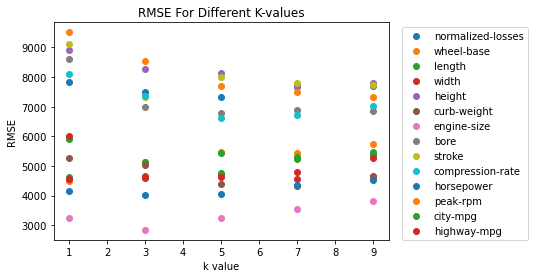

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

for k, v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.scatter(x, y, label=k)

plt.title("RMSE For Different K-values")
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc=(1.04,0))
plt.show()

```engine-size``` clearly outperformed all the other features for every k value.

Let's inspect the lowest RMSE value

In [10]:
# Search the value of the lowest RMSE
k_value = 0
best_rmse = 0
feature = None

for col, values in k_rmse_results.items():
    k =  min(values, key=values.get)
    if (values[k] < best_rmse) or best_rmse == 0:
        best_rmse = values[k]
        feature = col
        k_value = k
        
        
print('feature: {}, k: {}, rmse: {}'.format(feature, k_value, best_rmse))

feature: engine-size, k: 3, rmse: 2840.562805643501


Let's have a look at the average RMSE for each feature across all k values

In [11]:
feature_avg_rmse = {}

for feature, val in k_rmse_results.items():
    feature_avg_rmse[feature] = np.mean(list(val.values()))
    
series_avg_rmses = pd.Series(feature_avg_rmse)
sorted_avg_rmses = series_avg_rmses.sort_values()

sorted_avg_rmses 

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

### Multivariate Model

The best univariate model used the ```engine-size``` feature and a k value of 3, and achieved a RMSE of 2840.6.

Let's now modify the ```knn_train_test()``` function to work with multiple features and use the default k value of 5 for now.

We'll train and test models using the two, three, four and five best features from above.

In [12]:
# Updated to accept a list of column names (features)
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    train_set = rand_df.iloc[0:int(len(df)/2)]
    test_set = rand_df.iloc[int(len(df)/2):].copy()
    
    knn = KNeighborsRegressor()
    knn.fit(train_set[train_cols], train_set[target_col])
    predictions = knn.predict(test_set[train_cols])
    mse = mean_squared_error(test_set[target_col], predictions)
    rmse = mse**(1/2)
    return rmse

feature_list = []

for i in range(4):
    cols = list(sorted_avg_rmses.iloc[0:i+2].index)
    feature_list.append(cols)
    rmse = knn_train_test(cols,'price', normalized_cars)
    print("Best {} features - RMSE: {}".format(len(cols), rmse))
    

Best 2 features - RMSE: 2949.8817277180374
Best 3 features - RMSE: 3580.7376651928435
Best 4 features - RMSE: 3487.340917327035
Best 5 features - RMSE: 3410.2170133901805


Now let's use the best three models above and vary the k value from 1 to 25

In [13]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    train_set = rand_df.iloc[0:int(len(df)/2)]
    test_set = rand_df.iloc[int(len(df)/2):].copy()
    # k values, 1-25
    k_vals = [k for k in range(1,26)]
    k_rmse = {}
    for k in k_vals:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[train_cols], train_set[target_col])
        predictions = knn.predict(test_set[train_cols])
        mse = mean_squared_error(test_set[target_col], predictions)
        rmse = mse**(1/2)
        k_rmse[k] = rmse
    return k_rmse

k_rmse_results = {}

# Index's of feature_list
best_3models = [0, 2, 3 ]
    
for model in best_3models:
    rmses = knn_train_test(feature_list[model],'price', normalized_cars)
    k_rmse_results[model + 2] = rmses
    
# Show results
k_rmse_results

{2: {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579,
  25: 4955.892429427362},
 4: {1: 2952.725686581471,
  2: 3131.704952720018,
  3: 3129.692821910155,
  4: 3241.4320776448717,
  5: 3487.340917327035,
  6: 3637.0381471429987,
  7: 3606.195077860286,
  8: 3809.9307026308247,
  9: 3875.274902378068,
  10: 3997.1583055842293,
  11: 4162.564050411074,
  12: 4289.486490995821,
  13: 4368.061602779942,
  14: 4416.304772968801,
  15: 4434.013914355171,


Let's visualize the results

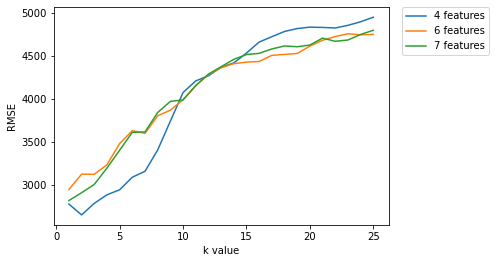

In [14]:
for k, v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x, y, label=str((k+2)) + " " + 'features')
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc=(1.04,0.78))
plt.show()

In [15]:
# Search the model with the lowest RMSE
k_value = 0
best_rmse = 0
best_model = None

for model, values in k_rmse_results.items():
    k =  min(values, key=values.get)
    if (values[k] < best_rmse) or best_rmse == 0:
        best_rmse = values[k]
        best_model = model
        k_value = k
        
        
print('model: {}-features, k: {}, rmse: {}'.format(best_model+2, k_value, best_rmse))

model: 4-features, k: 2, rmse: 2657.7963807419765


### K-Fold Cross Validation

So far we've been using the ```knn_train_test()``` function to train the model on half of the data and test the model on the second half, this makes the model biased towards the training set.

Next we'll use a more robust technique **"K_Fold Cross Validation"** where we'll split the data into k partitions, rotating through the subsets, while using k-1 partitions for the training set and the remaining partition for the test set, we'll do this until all the subsets have been used as the test set.

We'll split the data into ten partitions, at the same time we'll train and test each model on 1 to 25 different k values, return the avg mean of the RMSE's and the standard devation.

We'll evaluate models with the best (2,3,4 and 5) features from above.

In [16]:
# Reminder of what the features are.
feature_list

[['engine-size', 'horsepower'],
 ['engine-size', 'horsepower', 'width'],
 ['engine-size', 'horsepower', 'width', 'curb-weight'],
 ['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg']]

In [17]:
# Import libraries
from sklearn.model_selection import cross_val_score, KFold

def cross_validate(cols, target, df):
    k_values = [k for k in range(1,26)]
    rmses_std = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
        kfold = KFold(n_splits = 10, shuffle=True, random_state=1)
        mse = cross_val_score(estimator = knn, X=df[cols], y=df[target], scoring="neg_mean_squared_error")
        rmses_std[k] = [np.mean(np.sqrt(np.abs(mse))), np.std(np.sqrt(np.abs(mse)))]
    return rmses_std

# Cross validate models and store results.
k_mean_rmses = {}

for models in feature_list:
    k_mean_rmses[len(models)] = cross_validate(models, 'price', normalized_cars)

In [18]:
# View results
k_mean_rmses

{2: {1: [4054.3752998577393, 641.28442852553],
  2: [3633.9900942986233, 239.99014911788342],
  3: [3542.377060710639, 403.4142904645972],
  4: [3429.8695620126005, 545.2332303341288],
  5: [3673.4736628986793, 575.3857312756506],
  6: [3880.893015736104, 691.3780570462612],
  7: [3923.514094644287, 791.0534429845613],
  8: [3949.848565395668, 916.5952509707985],
  9: [4084.4628064649246, 1116.5538544553788],
  10: [4197.4647619522675, 1293.520421626236],
  11: [4263.945698929956, 1461.5741949227508],
  12: [4345.145057787431, 1565.557950481374],
  13: [4490.99482680984, 1661.049351435575],
  14: [4485.565504865057, 1686.529814305486],
  15: [4440.05559159143, 1714.152137502057],
  16: [4411.832860091445, 1719.4364537945103],
  17: [4426.512391957291, 1734.4176979157105],
  18: [4460.287748806414, 1792.795121261517],
  19: [4518.607625911034, 1817.3023822162784],
  20: [4597.380214023414, 1849.300651017786],
  21: [4682.397141239942, 1837.0279062733227],
  22: [4746.7960397393745, 1807

Let's plot the average RMSE (proxy for bias) and standard devation (proxy for variance) for each model using 1-25 k-values.

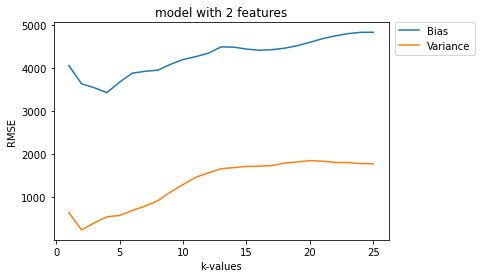

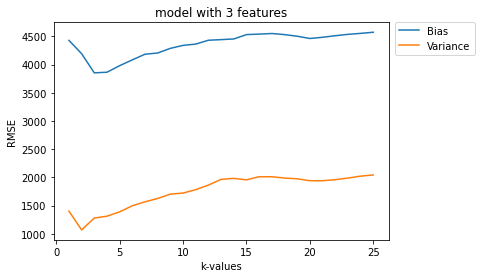

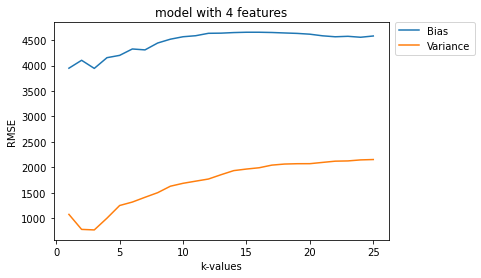

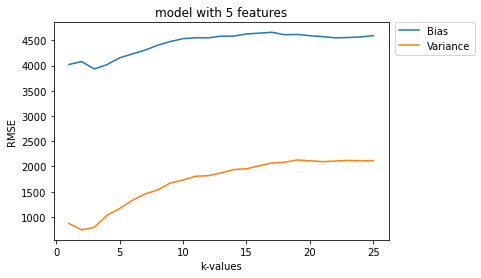

In [19]:
models = [2,3,4,5]
for model in models:
    x = [k for k in range(1,26)]
    y1 = [row[0] for row in list(k_mean_rmses[model].values())]
    y2 = [row[1] for row in list(k_mean_rmses[model].values())]
    plt.plot(x, y1, label='Bias')
    plt.plot(x, y2, label='Variance')
    plt.title("model with {} features".format(model))
    plt.xlabel('k-values')
    plt.ylabel("RMSE")
    plt.legend(loc=(1.02,0.85))
    plt.show()

Next, let's print the best optimized models, with low bias and low variance.

In [20]:
rmses = {}

for key, value in k_mean_rmses.items():
    rmse = None
    std = None
    k_value = None
    for k, v in value.items():
        if (rmse is None or v[0] < rmse) or (std is None or v[1] < std):
            rmse = v[0]
            std = v[1]
            k_value = k
    rmses[key] = [k_value, rmse, std]
    
for k, v in rmses.items():
    print("Mode: {} features, K-value: {}, Avg RMSE: {}, Std {}".format(k, v[0], round(v[1],2), round(v[2], 2)))

Mode: 2 features, K-value: 4, Avg RMSE: 3429.87, Std 545.23
Mode: 3 features, K-value: 3, Avg RMSE: 3853.99, Std 1278.16
Mode: 4 features, K-value: 3, Avg RMSE: 3943.2, Std 771.65
Mode: 5 features, K-value: 3, Avg RMSE: 3934.41, Std 793.45


The best performing model was the model with 2 features, k-value of 4, RMSE of 3429.87 and a standard devation of 545.23.

So on average we can expect our predictions to be of by \$3429.87 in either direction. The average price of cars in our dataset is 13207.12 dollars. To make better predictions, we might need to do better feature selection, better imputation of missing values, collect more data, or use a different estimator.

Below we'll plot the distribution of the 'price' variable, with the mean and standard devation of the distribution and the mean +- the RMSE for our best performing model

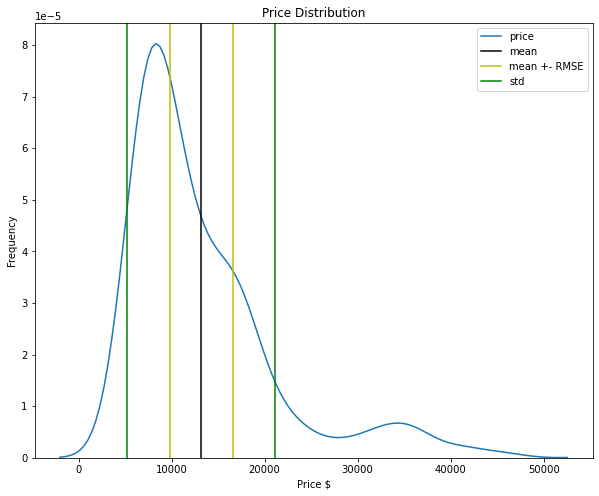

In [21]:
# Plot price distribution
import seaborn as sns

mean = normalized_cars['price'].mean()
std = normalized_cars['price'].std()
plt.figure(figsize=(10,8))
sns.kdeplot(normalized_cars['price'])
plt.title('Price Distribution')
plt.axvline(mean, color='black', label='mean')
plt.axvline(mean + 3429.87, color='y', label='mean +- RMSE' )
plt.axvline(mean - 3429.87, color='y' )
plt.axvline(mean+std, color='g', label='std')
plt.axvline(mean-std, color='g')
plt.xlabel('Price $')
plt.ylabel('Frequency')
plt.legend()
plt.show()